In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
from subprocess import call

min: 102
average: 105.825165033
variance: 14.5753539186


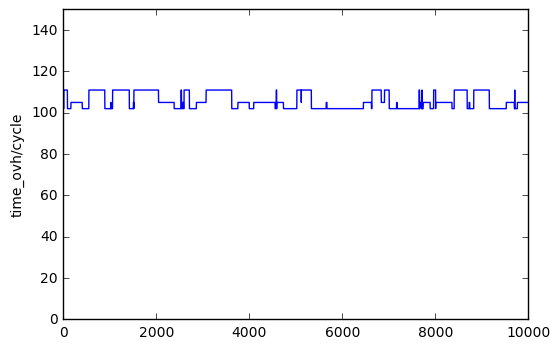

102


In [6]:
def loadData(filename):
    intData = []
    for line in open(filename).readlines():
        intData.append(int(line))
    return intData

#filter out abnormal data
def preProcess(data):
    data = data[2:]
    avg = np.average(data)
    board = 2 * avg
    data = [x for x in data if x < board]
    return data

def runTest(testbin, p1):
    resultfile = testbin + '.result'
    with open(resultfile, 'w') as outfile:
        call(['./' + testbin, str(p1)], stdout=outfile)

def analyzeOvh(testbin, loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'variance:', np.var(data)
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,150])
    plt.show()
    return min(data)

def analyzeTimeOvh():
    return analyzeOvh('time_ovh', 10000)
    
time_ovh_min = analyzeTimeOvh()
print time_ovh_min

min: {0: 0, 1: 0, 2: 0, 3: 0, 4: 18, 5: 36, 6: 54, 7: 66, 8: 84, 9: 102, 10: 123, 11: 132, 12: 150, 13: 168, 14: 186, 15: 195, 16: 213, 17: 234, 18: 252, 19: 270, 20: 282, 21: 297, 22: 318, 23: 327, 24: 345, 25: 363, 26: 384, 27: 393, 28: 411, 29: 429, 30: 447, 31: 465, 32: 474, 33: 495, 34: 513, 35: 531, 36: 543, 37: 561, 38: 579, 39: 588, 40: 606, 41: 624, 42: 642, 43: 663, 44: 672, 45: 690, 46: 708, 47: 726, 48: 738, 49: 756, 50: 774}
average: {0: 2.0921843687374748, 1: 5.3747494989979963, 2: 5.1462925851703405, 3: 7.1903807615230457, 4: 24.015030060120239, 5: 40.518036072144291, 6: 56.248496993987978, 7: 72.853707414829657, 8: 89.311623246492985, 9: 105.84769539078157, 10: 126.76052104208416, 11: 134.77755511022045, 12: 154.56613226452905, 13: 171.07214428857716, 14: 192.08116232464931, 15: 203.33567134268537, 16: 219.84769539078155, 17: 236.3567134268537, 18: 252.81462925851704, 19: 273.37274549098197, 20: 285.09318637274549, 21: 301.57815631262525, 22: 322.29559118236472, 23: 334

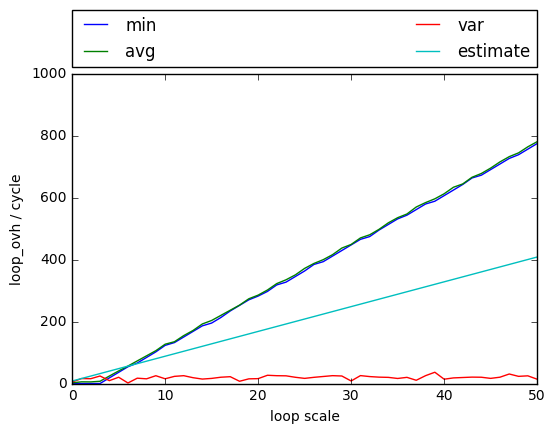

In [18]:
def loadData2(filename):
    data = {}
    for line in open(filename).readlines():
        nums = line.split(',')
        loopscale = int(nums[0])
        cycle = int(nums[1])
        if data.get(loopscale, []) == []:
            data[loopscale] = []
        data[loopscale].append(cycle)
    return data

#filter out abnormal data
def preProcess2(data, time_ovh_min=time_ovh_min):
    data = data[2:]
    avg = np.average(data)
    board = 2 * avg
    data = [x-time_ovh_min for x in data if x < board]
    return data

def runTest2(testbin, p1, p2):
    resultfile = testbin + '.result'
    with open(resultfile, 'w') as outfile:
        call(['./' + testbin, str(p1), str(p2)], stdout=outfile)

def analyzeLoopOvh(data, preProcessFunc=preProcess2):
    ylabel = 'loop_ovh / cycle'
    xlabel = 'loop scale'
    yrange = [0,1000]

    minOvh = {}
    avgOvh = {}
    varOvh = {}
    for loopscale, circles in data.iteritems():
        circles = preProcessFunc(data[loopscale])
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = np.var(circles)
        
    print 'min:', minOvh
    print 'average:', avgOvh
    print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    plt.plot(varOvh.keys(), varOvh.values(), label='var')
    plt.plot(range(8, 409, 8), label='estimate')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
    return minOvh
        
#loopscale = 50
#repetetime = 2000
#runTest2('loop_ovh', loopscale, repetetime)
loop_ovh = loadData2('loop_ovh.result')
loop_ovh_min = analyzeLoopOvh(loop_ovh)

min: {0: 0, 1: 0, 2: 0, 3: 0, 4: 18, 5: 36, 6: 54, 7: 66, 8: 84, 9: 102, 10: 123, 11: 132, 12: 150, 13: 168, 14: 186, 15: 195, 16: 213, 17: 234, 18: 252, 19: 270, 20: 282, 21: 297, 22: 318, 23: 327, 24: 345, 25: 363, 26: 384, 27: 393, 28: 411, 29: 429, 30: 447, 31: 465, 32: 474, 33: 495, 34: 513, 35: 531, 36: 543, 37: 561, 38: 579, 39: 588, 40: 606, 41: 624, 42: 642, 43: 663, 44: 672, 45: 690, 46: 708, 47: 726, 48: 738, 49: 756, 50: 774}
average: {0: 2.0921843687374748, 1: 5.3747494989979963, 2: 5.1462925851703405, 3: 7.1903807615230457, 4: 24.015030060120239, 5: 40.518036072144291, 6: 56.248496993987978, 7: 72.853707414829657, 8: 89.311623246492985, 9: 105.84769539078157, 10: 126.76052104208416, 11: 134.77755511022045, 12: 154.56613226452905, 13: 171.07214428857716, 14: 192.08116232464931, 15: 203.33567134268537, 16: 219.84769539078155, 17: 236.3567134268537, 18: 252.81462925851704, 19: 273.37274549098197, 20: 285.09318637274549, 21: 301.57815631262525, 22: 322.29559118236472, 23: 334

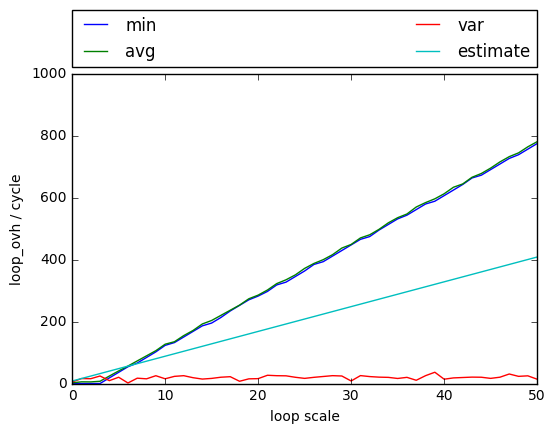

In [228]:
loop_ovh = loadData2('loop_ovh.result')
loop_ovh_min = analyzeLoopOvh(loop_ovh)

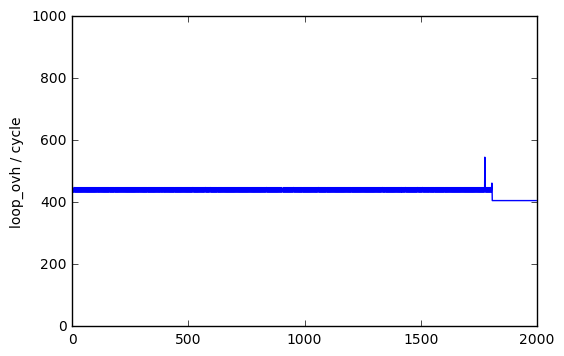

In [133]:
plt.plot(loop_ovh[29], label='var')
plt.ylabel('loop_ovh / cycle')
axes = plt.gca()
axes.set_ylim([0,1000])

plt.show()

loop_ovh: 876
50 876
50 876
50 876
50 876
50 876
50 876
50 876
50 876
min: {0: 0.0, 1: 0.0, 2: 0.18, 3: 2.46, 4: 3.0, 5: 5.22, 6: 8.58, 7: 10.5}
average: {0: 0.12149474737368686, 1: 0.11995794953944733, 2: 0.34000600240096046, 3: 2.6397959591918383, 4: 3.0165846338535411, 5: 5.2953990798159634, 6: 8.6113173952185633, 7: 11.125174069627848}
variance: {0: 0.0036064100524499372, 1: 0.00360540471954411, 2: 0.0044099639495654205, 3: 0.0007114606678086966, 4: 0.002007903101216478, 5: 0.0045467851241782903, 6: 0.0039951935485617309, 7: 0.012309843649344628}


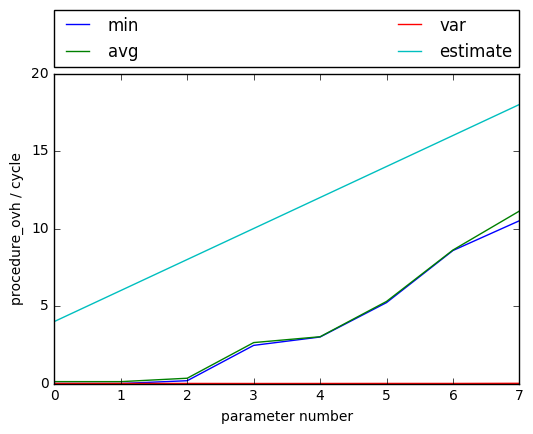

In [67]:
#filter out abnormal data
def preProcess3(data, loop, loop_ovh):
    data = data[2:]
    print loop, loop_ovh
    data = [(x-loop_ovh)/float(loop) for x in data]
    avg = np.average(data)
    border = 2 * avg
    data = [x for x in data if x < border]
    return data

def analyzeProcedureOvh(data, preProcessFunc=preProcess3):
    ylabel = 'procedure_ovh / cycle'
    xlabel = 'parameter number'
    yrange = [0,20]

    minOvh = {}
    avgOvh = {}
    varOvh = {}
    loop_ovh = min(data[-1])
    print 'loop_ovh:', loop_ovh
    for loopscale, circles in data.iteritems():
        if loopscale == -1:
            continue
        circles = preProcessFunc(data[loopscale], 50, loop_ovh)
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = np.var(circles)
        
    print 'min:', minOvh
    print 'average:', avgOvh
    print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    plt.plot(varOvh.keys(), varOvh.values(), label='var')
    plt.plot(range(4, 19, 2), label='estimate')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
        
#loopscale = 50
#repetetime = 2000
#runTest2('', loopscale, repetetime)
procedure_ovh = loadData2('procedure.result')
analyzeProcedureOvh(procedure_ovh)

min: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}
average: {0: 5.24504900980196, 1: 7.7649529905981201, 2: 7.4735947189437884, 3: 7.4942988597719546, 4: 2.9729945989197839, 5: 3.0459091818363673, 6: 3.0444088817763553, 7: 5.2546509301860373}
variance: {0: 3.8900886301610953, 1: 4.338885702414651, 2: 4.528438389934261, 3: 4.529108087417897, 4: 3.7059705473344464, 5: 3.6952027919030868, 6: 3.693637345086349, 7: 3.922351697864813}


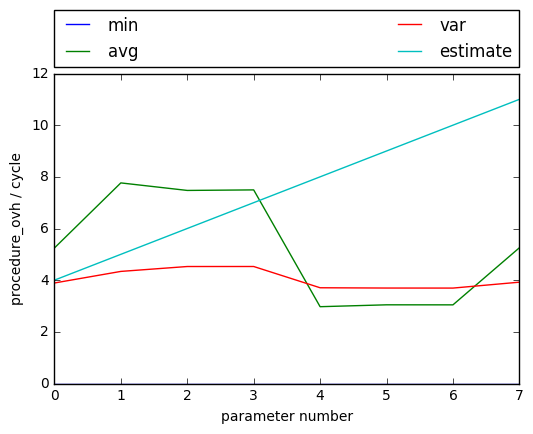

In [64]:
import math
#filter out abnormal data
def preProcess3(data):
    data = data[2:]
    avg = np.average(data)
    border = 2 * avg
    data = [x-102 for x in data if x < border]
    return data

def analyzeProcedureOvh(data, preProcessFunc=preProcess3):
    ylabel = 'procedure_ovh / cycle'
    xlabel = 'parameter number'
    yrange = [0,20]

    minOvh = {}
    avgOvh = {}
    varOvh = {}
    #loop_ovh = min(data[-1])
    #print 'loop_ovh:', loop_ovh
    for loopscale, circles in data.iteritems():
        if loopscale == -1:
            continue
        circles = preProcessFunc(data[loopscale])
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = math.sqrt(np.var(circles))
        
    print 'min:', minOvh
    print 'average:', avgOvh
    print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    plt.plot(varOvh.keys(), varOvh.values(), label='var')
    plt.plot(range(4, 12, 1), label='estimate')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    #axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
        
#loopscale = 50
#repetetime = 2000
#runTest2('', loopscale, repetetime)
procedure_ovh = loadData2('procedure.result')
analyzeProcedureOvh(procedure_ovh)

min: [128361, 127953, 127989, 127791, 129117, 130302, 131094, 129819, 130248, 129369, 128688, 128967, 128799, 129360, 129015, 126477, 127251, 128559, 127449, 129957, 126933, 127389, 127137, 127932, 126852, 126804, 127194, 127221, 126912, 127587, 126945, 126933, 125580, 127260, 127539, 128055, 127539, 127932, 127296, 126168, 126522, 127206, 127371, 127512, 127512, 127017, 126999, 126765, 127242, 126660, 126474, 126690, 126345, 125430, 126075, 127026, 127437, 127587, 127065, 127287, 128091, 126570, 127287, 127398, 127503, 126813, 127185, 127119, 127197, 127755, 126552, 127746, 127500, 127035, 127374, 127035, 128043, 127017, 127323, 127167]
avg: 127546.3125
standard deviation:  1035.94216289


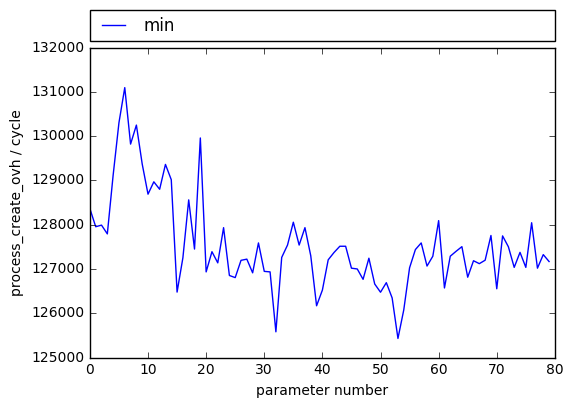

None


In [38]:
import math

def analyzeProcessOvh(data, preProcessFunc=preProcess):
    ylabel = 'process_create_ovh / cycle'
    xlabel = 'parameter number'
    yrange = [0,20]

    minOvh = {}
    avgOvh = {}
    varOvh = {}

    for loopscale, circles in data.iteritems():
        if loopscale == -1:
            continue
        circles = preProcessFunc(data[loopscale])
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = np.var(circles)
    
    print minOvh.values()
    print 'min:', min(minOvh.values())
    print 'avg:', np.average(minOvh.values())
    
    print 'standard deviation: ', math.sqrt(np.var(minOvh.values()))
    #print 'average:', avgOvh
    #print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    #plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    #plt.plot(varOvh.keys(), varOvh.values(), label='var')
    #plt.plot(range(4, 12, 1), label='estimate')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    #axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
    
process_ovh = loadData2('process_create_ovh.result')
process_ovh_min = analyzeProcessOvh(process_ovh)

[128361, 127953, 127989, 127791, 129117, 130302, 131094, 129819, 130479, 129369, 128688, 128967, 128799, 129360, 129015, 126477, 127251, 128559, 127449, 130425, 126933, 127389, 127137, 127932, 126852, 126804, 127194, 127221, 126912, 127587, 126945, 126933, 125580, 127260, 127539, 128055, 127539, 127932, 127296, 126168, 126522, 127206, 127371, 127512, 127512, 127017, 126999, 126765, 127242, 126660, 126474, 126690, 126345, 125430, 126075, 127026, 127437, 127587, 127065, 127287, 128091, 126570, 127287, 127398, 127503, 126813, 127185, 127119, 127197, 127755, 126552, 127746, 127500, 127035, 127374, 127035, 128043, 127017, 127323, 127167]
min: 125430
avg: 127555.05
standard deviation:  1058.4478837


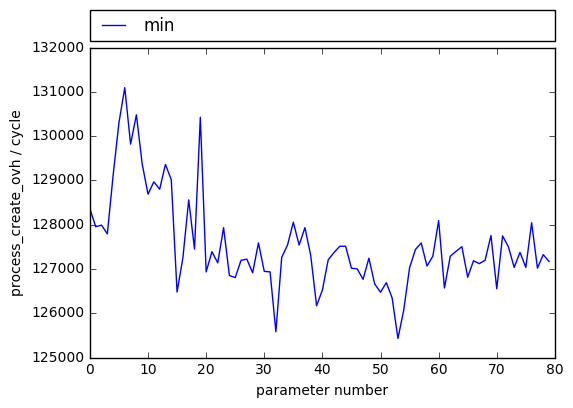

In [41]:
import math

def analyzeProcessOvh(data, preProcessFunc=preProcess):
    ylabel = 'process_create_ovh / cycle'
    xlabel = 'parameter number'
    yrange = [0,20]

    minOvh = {}
    avgOvh = {}
    varOvh = {}

    for loopscale, circles in data.iteritems():
        if loopscale == -1:
            continue
        circles = preProcessFunc(data[loopscale])
        data[loopscale] = circles
        minOvh[loopscale] = min(circles)
        avgOvh[loopscale] = np.average(circles)
        varOvh[loopscale] = np.var(circles)
    
    print minOvh.values()
    print 'min:', min(minOvh.values())
    print 'avg:', np.average(minOvh.values())
    
    print 'standard deviation: ', math.sqrt(np.var(minOvh.values()))
    #print 'average:', avgOvh
    #print 'variance:', varOvh
    
    plt.plot(minOvh.keys(), minOvh.values(), label='min')
    #plt.plot(avgOvh.keys(), avgOvh.values(), label='avg')
    #plt.plot(varOvh.keys(), varOvh.values(), label='var')
    #plt.plot(range(4, 12, 1), label='estimate')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    axes = plt.gca()
    #axes.set_ylim(yrange)
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    
    plt.show()
    
thread_ovh = loadData2('thread_create_ovh.result')
thread_ovh_min = analyzeProcessOvh(process_ovh)

min: 19254
average: 20635.2261448
standard: 1546.10867927


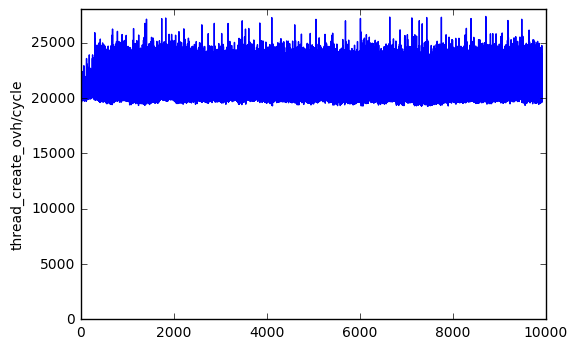

19254


In [71]:
import math
def analyzeThreadOvh(testbin='thread_create_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,28000])
    plt.show()
    return min(data)
    
print analyzeThreadOvh()

min: 127914
average: 134507.131169
standard: 3062.00125565


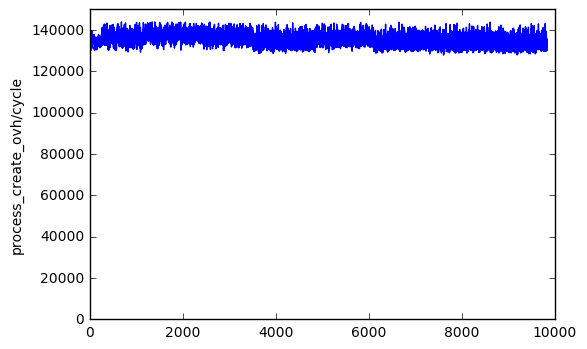

127914


In [68]:
import math
def analyzeProcessOvh(testbin='process_create_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,150000150])
    plt.show()
    return min(data)
    
print analyzeProcessOvh()

min: 77418
average: 79096.8520161
standard: 649.999539761


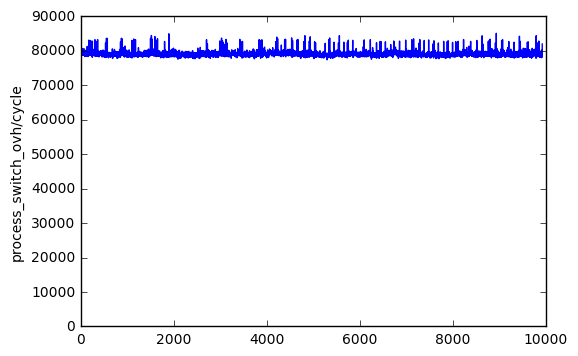

77418


In [69]:
import math
def analyzeProcessSwitchOvh(testbin='process_switch_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,90000])
    plt.show()
    return min(data)
    
print analyzeProcessSwitchOvh()

min: 1848
average: 2462.13065844
standard: 537.796411146


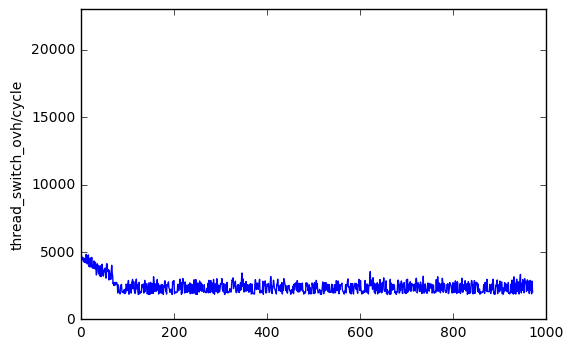

1848


In [75]:
import math
def analyzeThreadSwitchOvh(testbin='thread_switch_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,23000])
    plt.show()
    return min(data)
    
print analyzeThreadSwitchOvh()

min: 1833
average: 2562.22668004
standard: 838.330609846


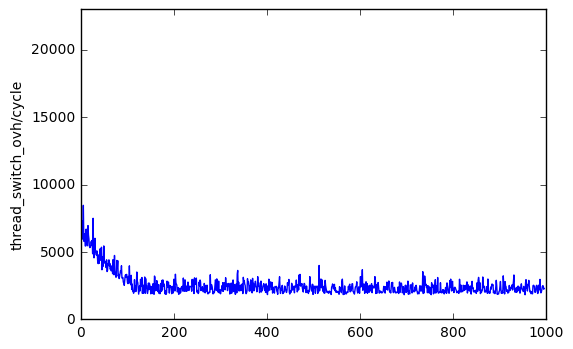

1833


In [72]:
import math
def analyzeProcessSwitchOvh(testbin='thread_switch_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,23000])
    plt.show()
    return min(data)
    
print analyzeProcessSwitchOvh()

min: 1242
average: 1249.98419051
standard: 31.0916188621


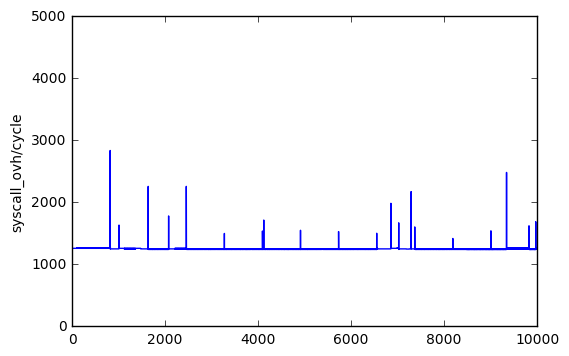

1242


In [74]:
import math
def analyzeSyscallOvh(testbin='syscall_ovh', loop = 10000):
    resultfile = testbin + '.result'
    ylabel = testbin + '/cycle'
    
    #with open(resultfile, 'w') as outfile:
    #    call(['./' + testbin, str(loop)], stdout=outfile)
    
    data = loadData(resultfile)
    data = preProcess(data)
    avg = np.average(data)
    sigma = math.sqrt(np.var(data))
    data = [x for x in data if x < avg+3*sigma and x > avg-3*sigma]
    print 'min:', min(data)
    print 'average:', np.average(data)
    print 'standard:', math.sqrt(np.var(data))
    plt.plot(data)
    plt.ylabel(ylabel)
    axes = plt.gca()
    axes.set_ylim([0,5000])
    plt.show()
    return min(data)
    
print analyzeSyscallOvh()